In [1]:
import numpy as np
import figure_options
from figure_options import plt, sns, rc_parameters
from tqdm import tqdm
from baifg.utils.characteristic_time import compute_characteristic_time_gaussian
from baifg.utils.graphs import make_loopless_clique
from baifg.utils.utils import approximate_solution


In [5]:
eps = 1e-2
N = 100
kvalues = np.array([5, 10, 15])
pvalues = np.linspace(eps, 1, N)

solutions = {
    K: {
        'T': np.zeros(N),
        'w': np.zeros((N,K)),
        'm': np.zeros((N,K)),
        'approximate_sol':  np.zeros((N,K)),
    } for K in kvalues
}

for pi, p in enumerate(tqdm(pvalues)):
    for ki, k in enumerate(kvalues):
        fg = make_loopless_clique(p, np.linspace(0, 1, k))
        sol = compute_characteristic_time_gaussian(fg)
        solutions[k]['T'][pi] = sol.value
        solutions[k]['w'][pi] = sol.wstar
        solutions[k]['m'][pi] = sol.mstar
        solutions[k]['approximate_sol'][pi] = approximate_solution(fg.reward_model, fg.graph)


  1%|          | 1/100 [00:00<00:12,  8.10it/s]c:\Users\russo\github\Best-Arm-Identification-with-Feedback-Graph\.venv\Lib\site-packages\cvxpy\problems\problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 100/100 [00:17<00:00,  5.77it/s]


## Plot characteristic time and information 

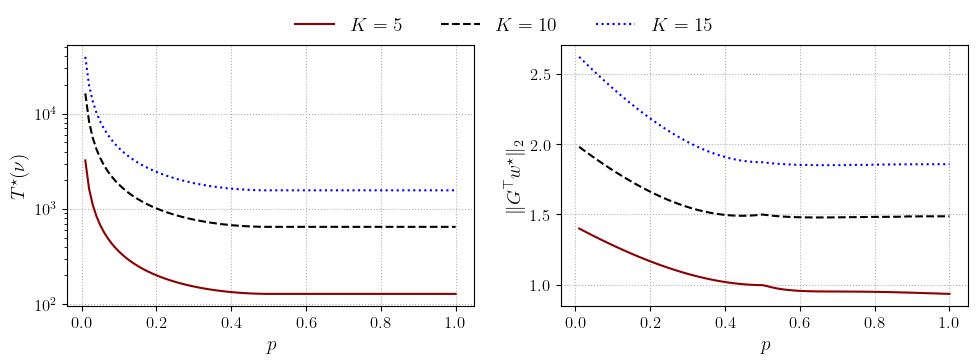

In [31]:
fig, ax = plt.subplots(1,2, figsize=(10,3.5))
ax[0].plot(pvalues, solutions[5]['T'],  'darkred', label=r'$K=5$')
ax[0].plot(pvalues, solutions[10]['T'], '--', color='black', label=r'$K=10$')
ax[0].plot(pvalues, solutions[15]['T'],  ':', color='blue',label=r'$K=15$')

ax[1].plot(pvalues, np.linalg.norm(solutions[5]['m'],axis=-1),  'darkred')#, label=r'$K=5$')
ax[1].plot(pvalues, np.linalg.norm(solutions[10]['m'],axis=-1), '--', color='black')#, label=r'$K=10$')
ax[1].plot(pvalues, np.linalg.norm(solutions[15]['m'],axis=-1),  ':', color='blue')#,label=r'$K=15$')


ax[0].set_yscale('log')
ax[0].set_xlabel(r'$p$')
ax[1].set_xlabel(r'$p$')
ax[0].set_ylabel(r'$T^\star(\nu)$')
ax[1].set_ylabel(r'$\|G^\top w^\star\|_2$')


ax[0].grid(linestyle = ":")
ax[1].grid(linestyle = ":")
fig.legend(loc='upper center', bbox_to_anchor=(.515, 1.07), ncols=3, frameon=False)
plt.tight_layout()
plt.savefig('figures/examples/characteristic_time_looplessclique.pdf', bbox_inches='tight')

## Plot $w^\star, \tilde w^\star$ and $m^\star$ for different values of $p$ and $q$

In [39]:
def plot_w(solutions0, xticks, label, namefile):
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots(1,1, figsize=(6,3))
    x = np.arange(solutions0.shape[0])
    for idx, solutions in enumerate([solutions0]):
        for i in range(solutions.shape[1]):
            ax.bar(x + i*width, solutions[:, i], width, label=f'${label}_{i+1}^\star$')

        # Add labels, title, and custom x-axis tick labels
        ax.set_xlabel(r'$p$')
        
        ax.set_title(f'Loopless clique' )
        ax.set_xticks(x + width*2)
        ax.set_xticklabels(xticks)
    ax.set_ylabel(f'${label}^\star$')
    ax.legend(handlelength=1, bbox_to_anchor=(1.25, 1.05))


    plt.tight_layout()
    plt.savefig(f'figures/examples/{namefile}.pdf', bbox_inches='tight')



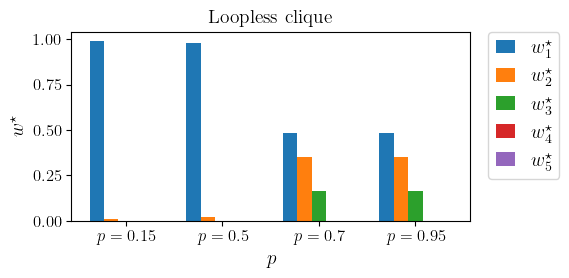

In [40]:

sol0 = compute_characteristic_time_gaussian(make_loopless_clique(p=0.15, mu=np.linspace(0, 1, 5)))
sol1 = compute_characteristic_time_gaussian(make_loopless_clique(p=0.5, mu=np.linspace(0, 1, 5)))
sol2 = compute_characteristic_time_gaussian(make_loopless_clique(p=0.7, mu=np.linspace(0, 1, 5)))
sol3 = compute_characteristic_time_gaussian(make_loopless_clique(p=0.95, mu=np.linspace(0, 1, 5)))
solutions = np.vstack([sol0.wstar, sol1.wstar, sol2.wstar, sol2.wstar])



plot_w(solutions,['$p=0.15$','$p=0.5$', '$p=0.7$', '$p=0.95$'], "w", "allocations_looplessclique")



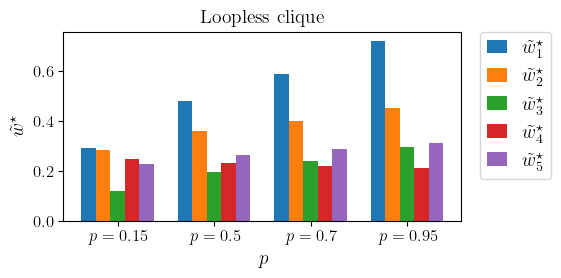

In [41]:
solutions = []
for p  in [0.15, 0.5, 0.7, 0.95]:
    env = make_loopless_clique(p=p, mu=np.linspace(0, 1, 5))
    solutions.append(approximate_solution(env.reward_model, env.graph))
solutions = np.vstack(solutions)

plot_w(solutions,['$p=0.15$','$p=0.5$', '$p=0.7$', '$p=0.95$'], r"\tilde w", "approx_w_looplessclique")



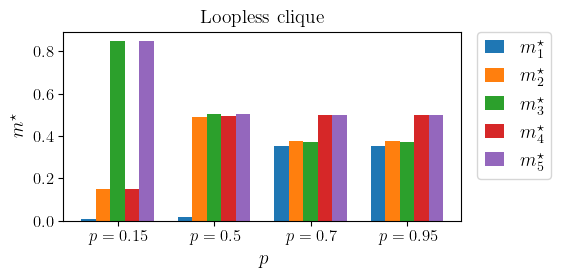

In [42]:

sol0 = compute_characteristic_time_gaussian(make_loopless_clique(p=0.15, mu=np.linspace(0, 1, 5)))
sol1 = compute_characteristic_time_gaussian(make_loopless_clique(p=0.5, mu=np.linspace(0, 1, 5)))
sol2 = compute_characteristic_time_gaussian(make_loopless_clique(p=0.7, mu=np.linspace(0, 1, 5)))
sol3 = compute_characteristic_time_gaussian(make_loopless_clique(p=0.95, mu=np.linspace(0, 1, 5)))
solutions = np.vstack([sol0.mstar, sol1.mstar, sol2.mstar, sol2.mstar])



plot_w(solutions,['$p=0.15$','$p=0.5$', '$p=0.7$', '$p=0.95$'], "m", "mstar_looplessclique")

